# Transiciones Radiativas

Nicolas Unger

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.special import sph_harm

Ry = 13.605693 # Energia de Rydberg (eV)
h = 4.135667e-15 # Constante de Planck (eV*s)
c = 299792458 # Velocidad de la luz (m/s)

## Uso el programa de diagonalizacion para sacar las energias

In [117]:
from numpy import diag,  linspace, array ,arange
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show
from numpy import pi,sqrt,zeros,sin,cos

    
%matplotlib inline

import time
from __future__ import division

In [118]:
from numpy import identity 

def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

In [119]:
from numpy import sqrt

# Normalización de las funciones 

def Normalizate(U,x):
    
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)

        
    for j in range(0,n):
        suma = 0.0
        for i in range(1,n):
             suma = suma + U[i,j]**2

        suma = suma*h
        rnorm = 1/sqrt(suma)
#        print j,' integral (sin normalizar) =',rnorm
       
#       Normalization
        rsign = 1
        if U[1,j] < 0:
            rsign = -1
            
        rnorm = rnorm * rsign
        for i in range(0,n):
            U[i,j] = U[i,j]*rnorm
         
    return  U

In [152]:
from numpy import diag,  linspace, array, arange, zeros
from numpy.linalg import eigh
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show

step = 0.02
xmin = step
xmax = 40
x = arange(xmin,xmax,step)
nsize = len(x)

x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])

# Diferencia de energia entre el estado 2p y 1s del Hidrogeno (H)

### Estado 1s

In [153]:
# Kinetic (T) and Potential (V)
lq = 0 # s
zq = 1 # H

T = -0.5*Laplacian(x)
V = -zq/x + lq*(lq+1)/(2 * x * x)

# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E_Hs,U_Hs = eigh(H)
E_H1s = E_Hs[0]

# Normalization
U_Hs=Normalizate(U_Hs,x)

### Estado 2p

In [154]:
# Kinetic (T) and Potential (V)
lq = 1 # p
zq = 1 # H

T = -0.5*Laplacian(x)
V = -zq/x + lq*(lq+1)/(2 * x * x)

# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E_Hp,U_Hp = eigh(H)
E_H2p = E_Hp[0]

# Normalization
U_Hp=Normalizate(U_Hp,x)

In [155]:
Delta_E = E_H2p - E_H1s
DE_eV = Delta_E * 2 * Ry
print "La diferencia de energia entre el estado 2p y 1s es: {:.3f} eV".format(DE_eV)

La diferencia de energia entre el estado 2p y 1s es: 10.203 eV


In [156]:
omegaH = 2*np.pi * DE_eV / h
omegaH_au = Delta_E # En unidades atomicas (h(barra) = 1)
lamdaH = h*c/DE_eV
print "La fercuencia angular de esa transicion es: {} Hz".format(omegaH)
print "La longitud de onda de la transicion es: {:.3f} nm".format(lamdaH*1e9)

La fercuencia angular de esa transicion es: 1.55017168271e+16 Hz
La longitud de onda de la transicion es: 121.512 nm


### Elemento de Matriz $\left< \phi_{1s} \; \middle| \; r \; \middle| \; \phi_{2p} \right>$


In [157]:
#Y00 = sph_harm(0,0,0,0) # Armonico esferico del 1s
#theta = np.linspace(0,np.pi,300)
#int_sph = np.trapz(sph_harm(0,1,0,theta),theta) # Integracion del armonico esferico del 2p

rif = np.trapz(U_Hs[:,0] * x * U_Hp[:,0], x) #* 4*np.pi #* int_sph * Y00
rif.real

1.2903849787684984

### Coeficiente de Einstein para la transicion de 2p a 1s

In [158]:
c_au = 137
Aif = 4*omegaH_au**3 * rif**2 / (3 * c_au**3)
Aif

4.551977684236538e-08

Da del orden correcto. Encontre que deberia dar 6.25e-8

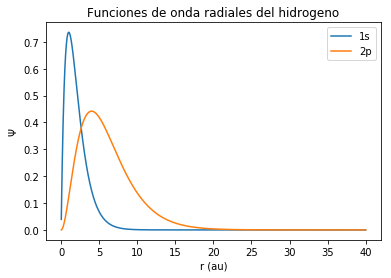

In [159]:
plot(x,U_Hs[:,0],label="1s")
plot(x,U_Hp[:,0],label="2p")
xlabel("r (au)")
ylabel("$\Psi$")
title("Funciones de onda radiales del hidrogeno")
plt.legend()
show()

# Transicion entre el 2p y 1s del Molibdeno ($Mo^{+41}$)

In [160]:
xmin = 0.0005
xmax = 1
nsize = 1000
x = linspace(xmin,xmax,nsize)

x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])

### Estado 1s

In [161]:
# Kinetic (T) and Potential (V)
lq = 0 # s
zq = 42 # H

T = -0.5*Laplacian(x)
V = -zq/x + lq*(lq+1)/(2 * x * x)

# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E_Mos,U_Mos = eigh(H)
E_Mo1s = E_Mos[0]

# Normalization
U_Mos=Normalizate(U_Mos,x)

### Estado 2p

In [162]:
# Kinetic (T) and Potential (V)
lq = 1 # p
zq = 42 # H

T = -0.5*Laplacian(x)
V = -zq/x + lq*(lq+1)/(2 * x * x)

# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E_Mop,U_Mop = eigh(H)
E_Mo2p = E_Mop[1]

# Normalization
U_Mop=Normalizate(U_Mop,x)

In [169]:
Delta_E_Mo = E_Mo2p - E_Mo1s
DE_eV_Mo = Delta_E_Mo * 2 * Ry
print "La diferencia de energia entre el estado 2p y 1s es: {:.3f} eV".format(DE_eV_Mo)

La diferencia de energia entre el estado 2p y 1s es: 23902.595 eV


In [172]:
omegaMo = 2*np.pi * DE_eV_Mo / h
omegaMo_au = Delta_E_Mo # En unidades atomicas (h(barra) = 1)
lamdaMo = h*c/DE_eV_Mo
print "La fercuencia de esa transicion es: {:.3f} THz".format(DE_eV*1e-12/h)
print "La longitud de onda de la transicion es: {:.3f} nm".format(h*c/DE_eV*1e9)

La fercuencia de esa transicion es: 5779622.828 THz
La longitud de onda de la transicion es: 0.052 nm


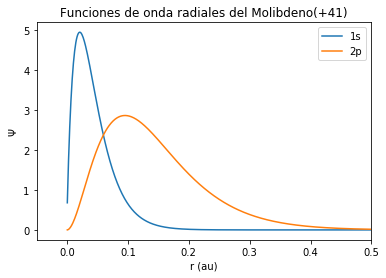

In [177]:
plot(x,U_Mos[:,0],label="1s")
plot(x,U_Mop[:,0],label="2p")
xlabel("r (au)")
ylabel("$\Psi$")
title("Funciones de onda radiales del Molibdeno(+41)")
plt.xlim([-0.05,0.5])
plt.legend()
show()

### Elemento de Matriz $\left< \phi_{1s} \; \middle| \; r \; \middle| \; \phi_{2p} \right>$


In [174]:
rif_Mo = np.trapz(U_Mos[:,0] * x * U_Mop[:,0], x)
rif_Mo

0.026311736679027371

### Coeficiente de Einstein

In [176]:
c_au = 137
Aif = 4*omegaMo_au**3 * rif_Mo**2 / (3 * c_au**3)
Aif

0.24330960604713581

### Elemento de matriz $\left< Y_{10} \middle| Y_{10}Y_{21} \right>$

In [168]:
nsize = 300
phinum = np.linspace(0,2*np.pi,nsize)
thetanum = np.linspace(0,np.pi,nsize)
Y10 = np.zeros([nsize, nsize],dtype=complex)
Y21 = np.zeros([nsize, nsize],dtype=complex)
sen = np.sin(thetanum)

for i in range(nsize):
    for j in range(nsize):
        Y10[i,j] = sph_harm(0,1,phinum[i],thetanum[j])
        Y21[i,j] = sph_harm(1,2,phinum[i],thetanum[j])

In [102]:
#Integro
res = np.trapz(sen * np.trapz(Y10*Y10*Y21,phinum,axis=0),thetanum)
print "{} + {}i".format(res.real,res.imag)

1.38121651277e-18 + -4.95853236795e-19i


In [108]:
np.trapz(x**2 * U_Hs[:,0] * U_Hp[:,1], x) * 4*np.pi

16.263599922680477